In [97]:
# what is heart disease, cardiovascular disease, this are heart conditions that includes, coronary heart disease, hypertension, cardiac arrest, etc....

# import all libaries and modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme( style="darkgrid", font_scale=2 )
df = pd.read_csv("./heart.csv")

df.dropna( inplace=True )
df.drop_duplicates( inplace=True )
# .describe the data
df.describe()
# df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


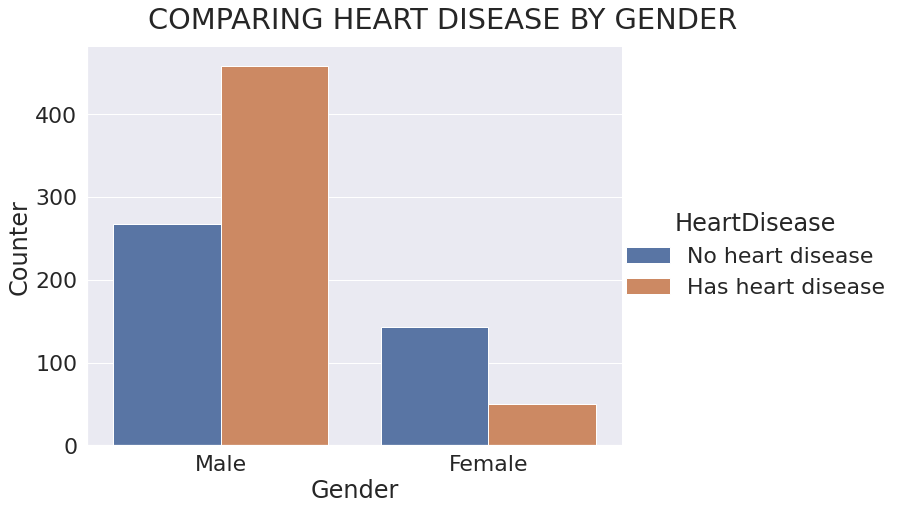

In [98]:
# plot data in graphs
df1 = df.copy()
df1.loc[ df1["HeartDisease"] == 1, "HeartDisease" ] = "Has heart disease"
df1.loc[ df1['HeartDisease'] == 0, "HeartDisease" ] = "No heart disease"
g = sns.catplot( data=df1, x="Sex", kind="count", hue="HeartDisease", height=7, aspect=1.3 )
g.set_axis_labels( x_var="Gender", y_var="Counter" ) # change axis labels
g.set_xticklabels(labels=["Male", "Female"]) # change bar names.
g.fig.suptitle('COMPARING HEART DISEASE BY GENDER') # set graph title
g.fig.subplots_adjust(top=.9) # set margin

# from data, alot of male experience angina than female.
# females that have heart disease where more than those that have heart disease.

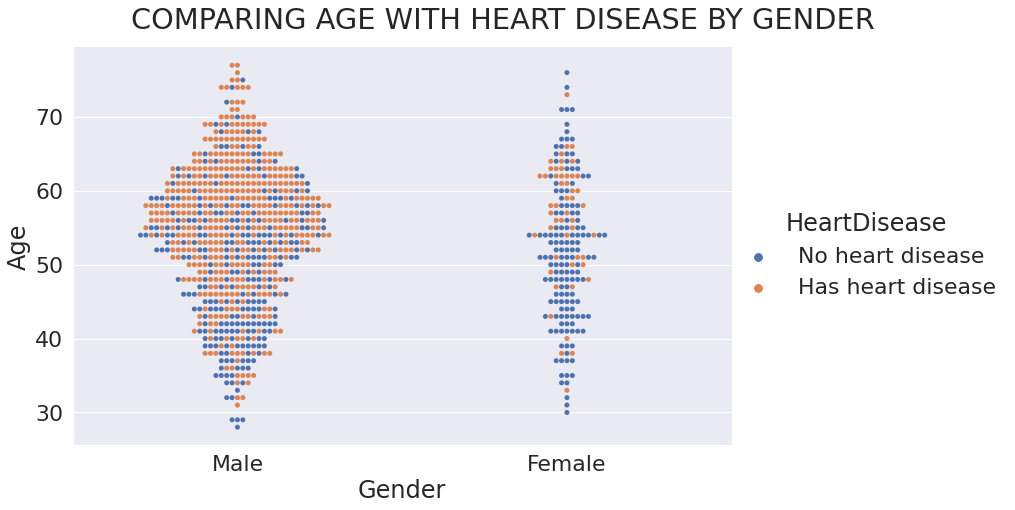

In [99]:
# show heart disease by age and gender
a = sns.catplot( data=df1, x="Sex", y="Age", hue="HeartDisease", kind="swarm", aspect=1.5, height=7 )
a.set_axis_labels( x_var="Gender", y_var="Age" ) # tick labels
a.set_xticklabels( labels=["Male", "Female"] )
a.fig.suptitle("COMPARING AGE WITH HEART DISEASE BY GENDER")
a.fig.subplots_adjust( top=.9)

# most men with heart disease are above 50 years old.
# both genderm don't have heart disease in their 20s

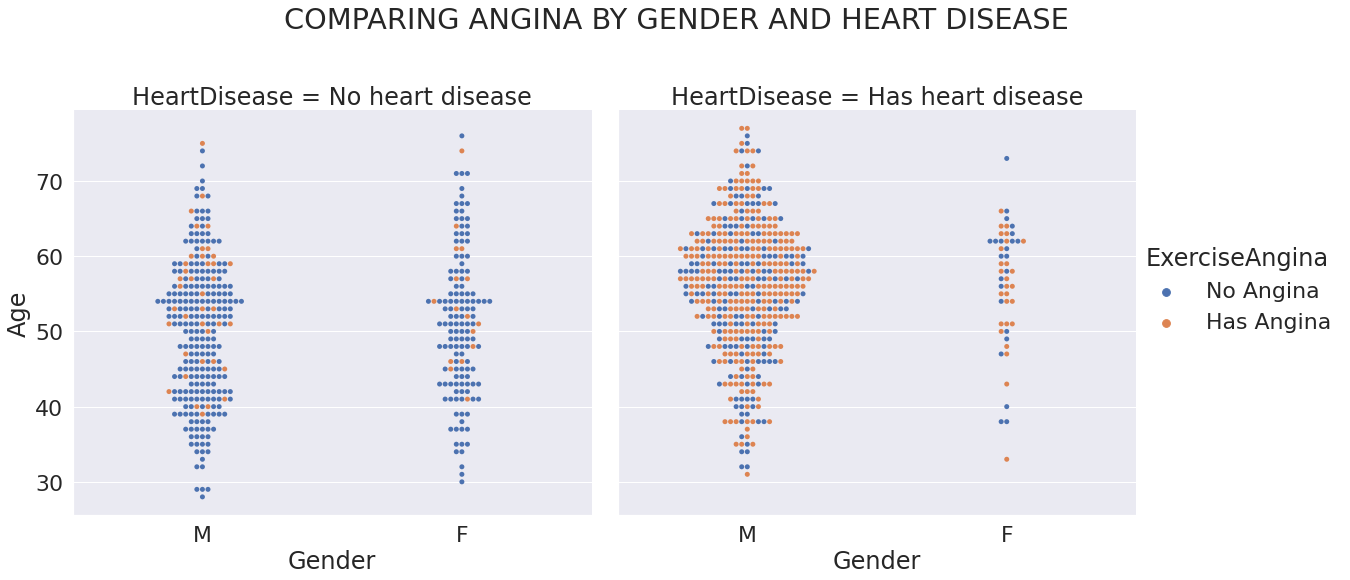

In [100]:
# comparing angina by gender with yhue of heart disease
df1.loc[ df1['ExerciseAngina'] == "Y", "ExerciseAngina" ] = "Has Angina"
df1.loc[ df1['ExerciseAngina'] == "N", "ExerciseAngina" ] = "No Angina"
c = sns.catplot(data=df1, y="Age", x="Sex", hue="ExerciseAngina", col="HeartDisease", kind="swarm", aspect=1, height=8)
c.set_axis_labels(x_var="Gender", y_var="Age")
c.fig.suptitle("COMPARING ANGINA BY GENDER AND HEART DISEASE")
c.fig.subplots_adjust(top=.8)

# angina: a chest pain caused by reduced blood flow to the heart muscles.
# is a sign one could be at risk of heart failure/attack.
# angina is experience by most men than female. would like to point that, this is because of alcohol intake, but my data ddnot provide that information. 
# most men who have NO heart disease but experience angina, are all above 35years old. and female are above 40 years old.
# some patients who DON'T have heart disease, still experience angina.
# a lot of patients who experience heart disease also have angina.
# a lot of men with heart disease experience angina. 
# both gender with heart disease can be in their lower 30 and experience angina, as compared to when they don't have heart disease.

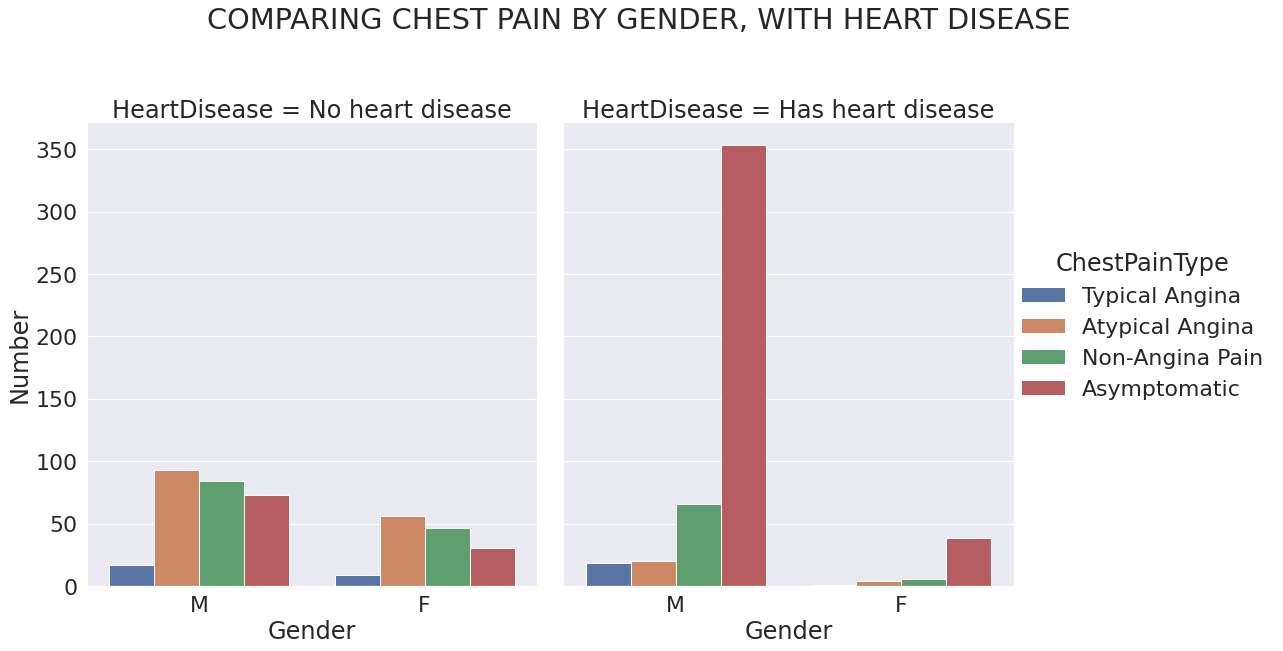

In [101]:
# comparing chest pain types with age
df1.loc[ df["ChestPainType"] == "TA", "ChestPainType" ] = "Typical Angina"
df1.loc[ df["ChestPainType"] == "ATA", "ChestPainType" ] = "Atypical Angina" 
df1.loc[ df["ChestPainType"] == "NAP", "ChestPainType" ] = "Non-Angina Pain"
df1.loc[ df["ChestPainType"] == "ASY", "ChestPainType" ] = "Asymptomatic" 
d = sns.catplot( data=df1, x="Sex", hue="ChestPainType", kind="count", aspect=.8, height=9, col="HeartDisease", hue_order=["Typical Angina", 'Atypical Angina', 'Non-Angina Pain', 'Asymptomatic'] )
d.set_axis_labels( x_var="Gender", y_var="Number" )
d.fig.suptitle("COMPARING CHEST PAIN BY GENDER, WITH HEART DISEASE")
d.fig.subplots_adjust(top=.8)

# both gender have high typical and atypical chest pain, when heart  disease is Not present.
# men have high asymptomatic chest pain when they have heart disease.
# when females have heart disease, most of the pain types are low, except asymptomatic pain.
# asymptomatic chest pain, is a good indication of heart disease in men, some female.

/home/kiks/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 22.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


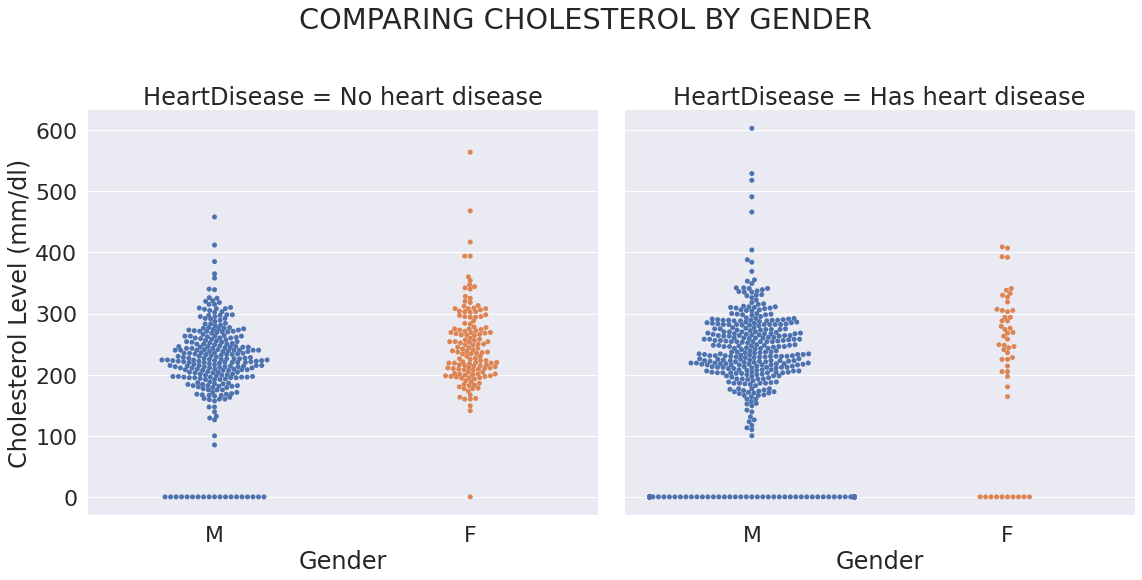

In [102]:
# check cholesterol level by gender
e = sns.catplot( data=df1, y="Cholesterol", x="Sex", height=8, kind="swarm", col="HeartDisease" )
e.set_axis_labels( x_var="Gender", y_var="Cholesterol Level (mm/dl)" )
e.fig.suptitle("COMPARING CHOLESTEROL BY GENDER")
e.fig.subplots_adjust( top=.8 )

# from data, both gender seems to have low cholesterol level and heart disease present..
# most men have heart disease than females from the data.
# females with heart disease have their cholesterol level  not more than 450mm/dl

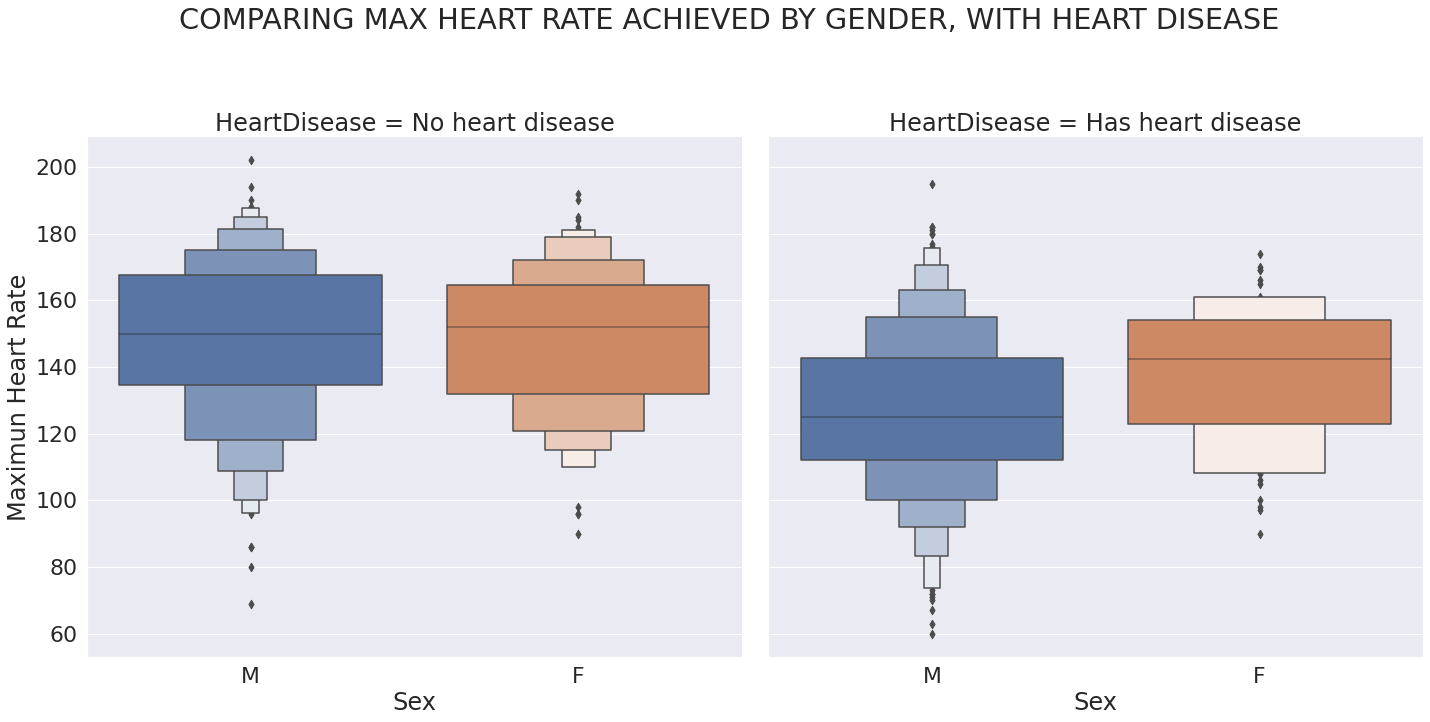

In [103]:
# compare max heart rate of people by gender and heart disease
f = sns.catplot( data=df1, y="MaxHR", x="Sex", height=10, col="HeartDisease", kind="boxen" )
f.set_axis_labels( y_var="Maximun Heart Rate" )
f.fig.suptitle("COMPARING MAX HEART RATE ACHIEVED BY GENDER, WITH HEART DISEASE")
f.fig.subplots_adjust(top=.8)

# most female with heart disease have heart rate between 120 and 160, while men have more than 160 heart rate when they have heart disease.
# both gender, seems to have high heart rate, when they dont have heart disease. so heart diseases reduces max heart rate. males seems to have high rate than females when no heart disease was found.

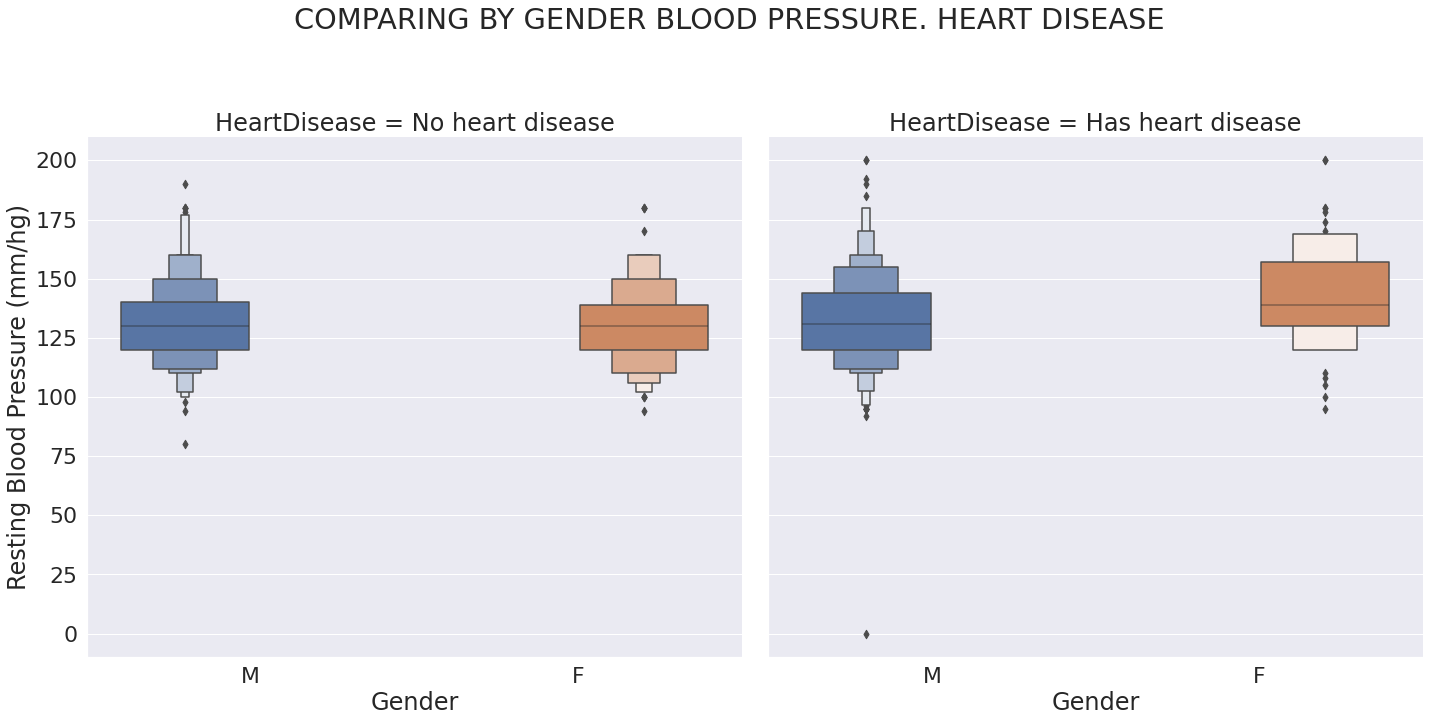

In [104]:
# find information in resting bp of the users.
# import matplotlib.ticker as ticker
# h.xaxis.set_major_locator(ticker.MultipleLocator(5))
# h.xaxis.set_major_formatter(ticker.ScalarFormatter())

h = sns.catplot( data=df1, x="Sex", y="RestingBP", hue="Sex", col="HeartDisease", kind="boxen", height=10)
h.set_axis_labels( x_var="Gender", y_var="Resting Blood Pressure (mm/hg)" )
h.fig.suptitle("COMPARING BY GENDER BLOOD PRESSURE. HEART DISEASE")
h.fig.subplots_adjust(top=.8)

# normal bp is from 90/60mm/hg and 120/80mm/hg
# high blood pressure is from 140/90mm/hg or hight
# low blood pressure is from 90/60mm/hg
# from this graph female have high blood pressure when with heart disease than men
# 1st graph, having high/low blood pressure does not mean heart disease

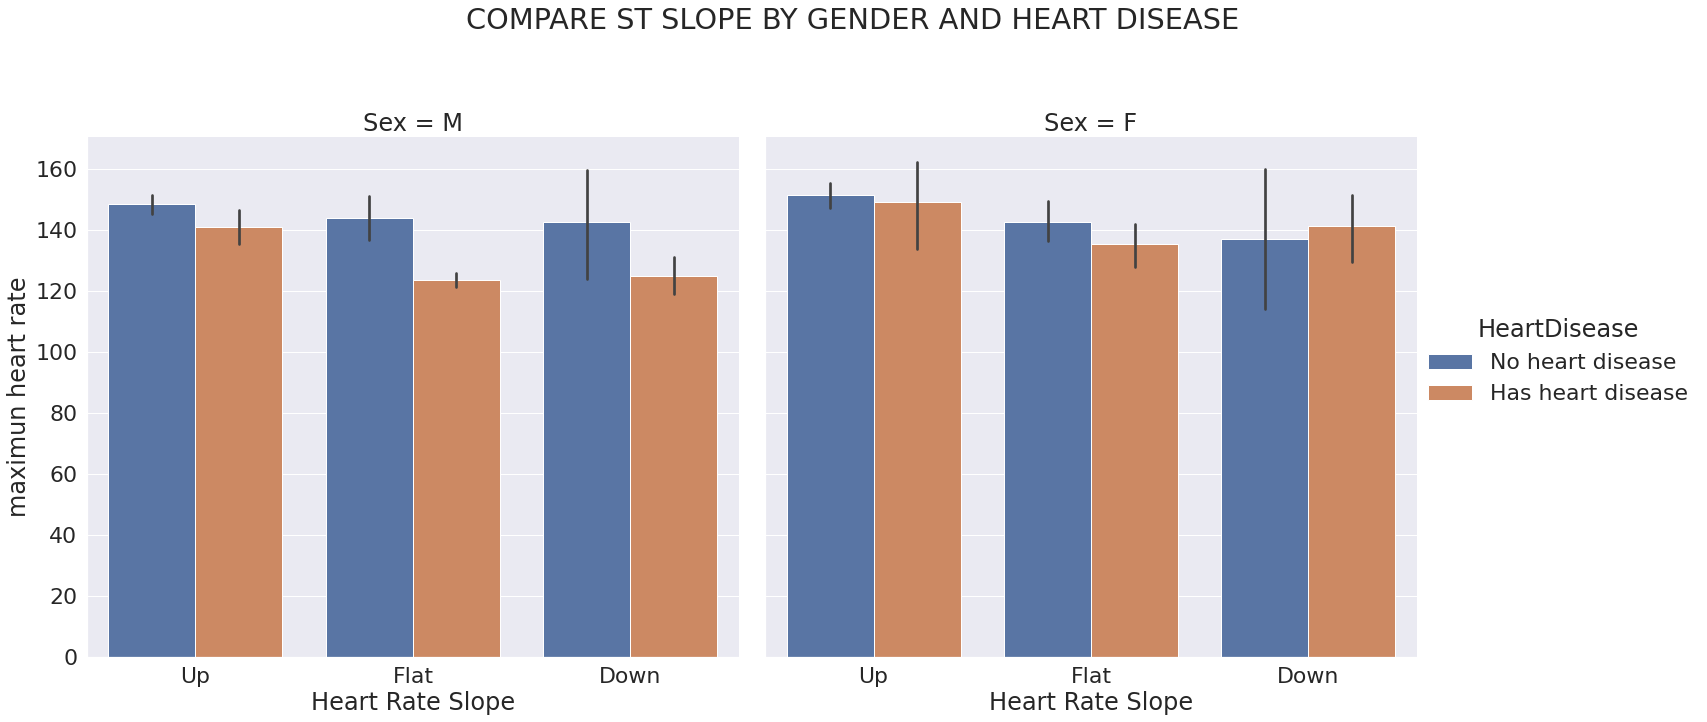

In [105]:
# comparing st/hr slope in patients
i = sns.catplot(data=df1, x="ST_Slope", y="MaxHR", hue="HeartDisease", kind="bar", col="Sex", height=10 )
i.set_axis_labels( x_var="Heart Rate Slope", y_var="maximun heart rate" )
i.fig.suptitle("COMPARE ST SLOPE BY GENDER AND HEART DISEASE")
i.fig.subplots_adjust(top=.8)

# st/heart rate slope, is amoung the best method to diagnose heart diseases.
# both gender have a high heart rate, with no heart disease.
# seems like heart disease reduces the maximun heart rate.

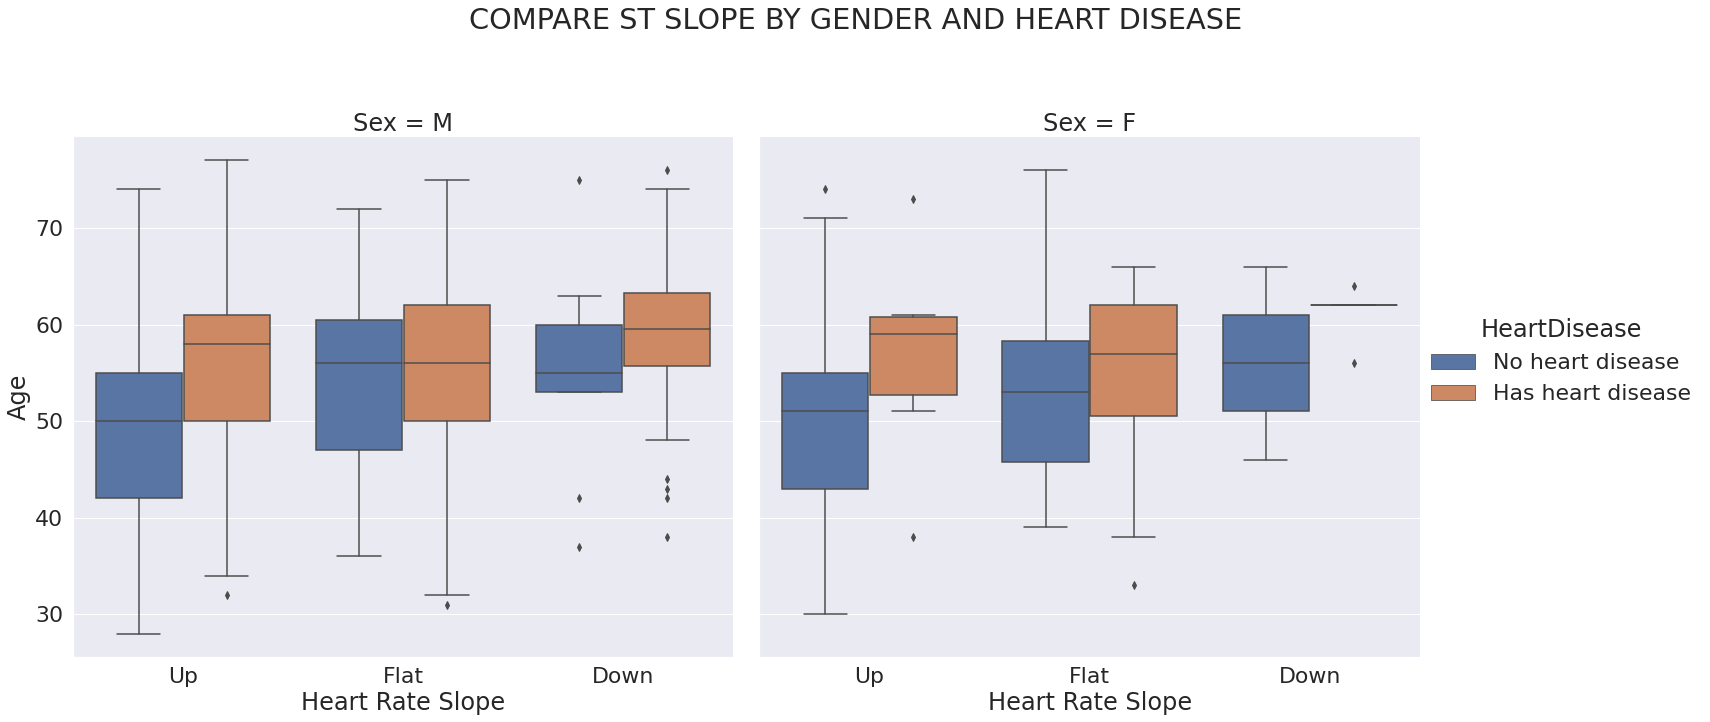

In [106]:
# comparing st/hr slope in patients
i = sns.catplot(data=df1, x="ST_Slope", y="Age", hue="HeartDisease", kind="box", col="Sex", height=10 )
i.set_axis_labels( x_var="Heart Rate Slope", y_var="Age" )
i.fig.suptitle("COMPARE ST SLOPE BY GENDER AND HEART DISEASE")
i.fig.subplots_adjust(top=.8)

# st/heart rate slope, is amoung the best method to diagnose heart diseases.
# from data & above graph, heart rate slope has high age with each heart rate slope type.
# when heart rate slope is up for females, most of them are on the 50-60 age. there are not a lot of females with heart disease and have a down heart rate slope.

In [107]:
# FASTING BP
# A blood sample will be taken after an overnight fast.
# A fasting blood sugar level less than 100 mg/dL (5.6 mmol/L) is normal.
# A fasting blood sugar level from 100 to 125 mg/dL (5.6 to 6.9 mmol/L) is considered prediabetes.
# If it's 126 mg/dL (7 mmol/L) or higher on two separate tests, you have diabetes.


# CHEST PAIN TYPE
# ASYMPTOPMATIC - silent myocardial ischemia can occur in the absence of chest discomfort or other anginal equivalent symptoms, e.g., dyspnea, nausea, diaphoresis, etc.
# dyspnea - shortnes of breath -
# TYPICAL ANGINA - Abdominal pain. Discomfort in the neck, jaw or back. Stabbing pain instead of chest pressure.
# ATYPICAL ANGINA -  fatigue, shortness of breath, discomfort in the throat, jaw, neck, arms, back and stomach—a feeling described almost like a muscle pull or pain. The problem may also present like indigestion or heartburn 
# NON-ANGINAL PAIN -  report squeezing or burning substernal chest pain, which may radiate to the back, neck, arms and jaws, and is indistinguishable from cardiac related chest pain.


# gender: [ 1 : M | 0 :F ]

In [108]:
# train the model with logistic regression.
from sklearn.linear_model import LogisticRegression as logReg
from sklearn.model_selection import train_test_split
from sklearn import metrics

# age
# sex
# chest pain type
# cholesterol level | min : 0 | max : 603
# fasting blood suger > 120mg/dl = 1 | < 120mg/dl = 0
# max hr | min : 60 | max : 202

data = df.copy() # get a copy of the data.
data.loc[ data['Sex'] == 'M', 'Sex' ] = 1 # NORMALISE GENDER 
data.loc[ data['Sex'] == 'F', 'Sex' ] = 0

data.loc[ data['ChestPainType'] == 'TA', 'ChestPainType' ] = 0 # NORMALISE CHEST PAIN TYPE. [ TA, ATA, NAP, AYS ]
data.loc[ data['ChestPainType'] == 'ATA', 'ChestPainType' ] = 1
data.loc[ data['ChestPainType'] == 'NAP', 'ChestPainType' ] = 2
data.loc[ data['ChestPainType'] == 'ASY', 'ChestPainType' ] = 3

# data[['Age', 'Sex', 'ChestPainType', 'Cholesterol', 'FastingBS', 'MaxHR']]
train = data[['Age', 'Sex', 'ChestPainType', 'Cholesterol', 'FastingBS', 'MaxHR']]
target = data[['HeartDisease']]

lr_model = logReg() # log reg class object
x_train, x_test, y_train, y_test = train_test_split( train, target, train_size=.75, random_state=0 )

lr_model.fit( x_train, y_train.values.ravel() )
y_pred = lr_model.predict( x_test )

print("Model Score:\t", lr_model.score( x_test, y_test ) )
print("Accuracy Score:\t", metrics.accuracy_score(y_test, y_pred ) ) # 
print("Precision Score:", metrics.precision_score(y_test, y_pred ) ) #. how accurate a model is.
print("Recall Score:\t", metrics.recall_score(y_test, y_pred ) ) # would recall the data.

# [ age, gender, chest pain type, cholesterol level, fasting blood suger, max hr ]  
user = [ 40, 1, 3, 289, 0, 172 ]
print("Class:\t\t", lr_model.predict([ user ])[0] )

Model Score:	 0.8217391304347826
Accuracy Score:	 0.8217391304347826
Precision Score: 0.8211920529801324
Recall Score:	 0.8985507246376812
Class:		 0
